In [3]:
# import library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# load data
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/store5.csv')
data

Mounted at /content/drive


,id,date,store_nbr,family,sales,onpromotion,dcoilwtico
0,1452,2013-01-01,5,AUTOMOTIVE,0.000,0,NaN
1,1453,2013-01-01,5,BABY CARE,0.000,0,NaN
2,1454,2013-01-01,5,BEAUTY,0.000,0,NaN
3,1455,2013-01-01,5,BEVERAGES,0.000,0,NaN
4,1456,2013-01-01,5,BOOKS,0.000,0,NaN
...,...,...,...,...,...,...,...
55567,3000586,2017-08-15,5,POULTRY,241.011,1,47.57
55568,3000587,2017-08-15,5,PREPARED FOODS,52.121,0,47.57
55569,3000588,2017-08-15,5,PRODUCE,1357.823,4,47.57
55570,3000589,2017-08-15,5,SCHOOL AND OFFICE SUPPLIES,0.000,0,47.57


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55572 entries, 0 to 55571
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           55572 non-null  int64  
 1   date         55572 non-null  object 
 2   store_nbr    55572 non-null  int64  
 3   family       55572 non-null  object 
 4   sales        55572 non-null  float64
 5   onpromotion  55572 non-null  int64  
 6   dcoilwtico   38379 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 3.0+ MB


In [6]:
data.isnull().sum()

,0
id,0
date,0
store_nbr,0
family,0
sales,0
onpromotion,0
dcoilwtico,17193


In [7]:
data['date'] = pd.to_datetime(data['date'])

numeric_cols = ['sales', 'onpromotion', 'dcoilwtico']
data_num = data[numeric_cols].dropna()

## Correlation Matrix

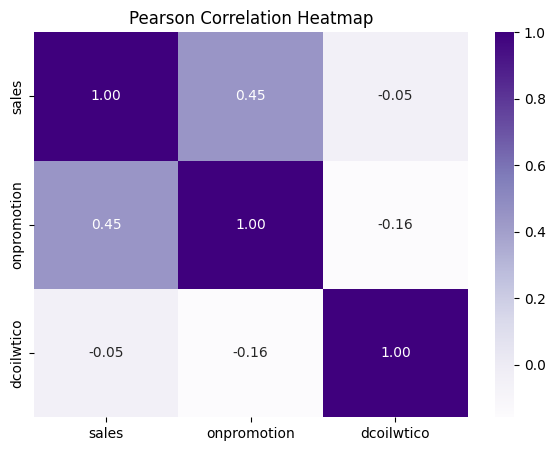

In [8]:
correlation_matrix = data_num.corr(method='pearson')

plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='Purples', fmt='.2f')
plt.title('Pearson Correlation Heatmap')
plt.show()

In [9]:
zero_sales_count = (data['sales'] == 0).sum()
zero_onpromotion_count = (data['onpromotion'] == 0).sum()

print(f"Nilai 0 di sales: {zero_sales_count}")
print(f"Nilai 0 di onpromotion: {zero_onpromotion_count}")

Nilai 0 di sales: 12414
Nilai 0 di onpromotion: 42357


# Top 3 Families

In [10]:
# top 3 families

family_sales = data.groupby('family')['sales'].sum().reset_index()
top_3_family = family_sales.sort_values(by='sales', ascending=False).head(3)

print(top_3_family)

       family        sales
12  GROCERY I  5262681.658
3   BEVERAGES  2533831.000
7    CLEANING  1667748.000


# Histograms

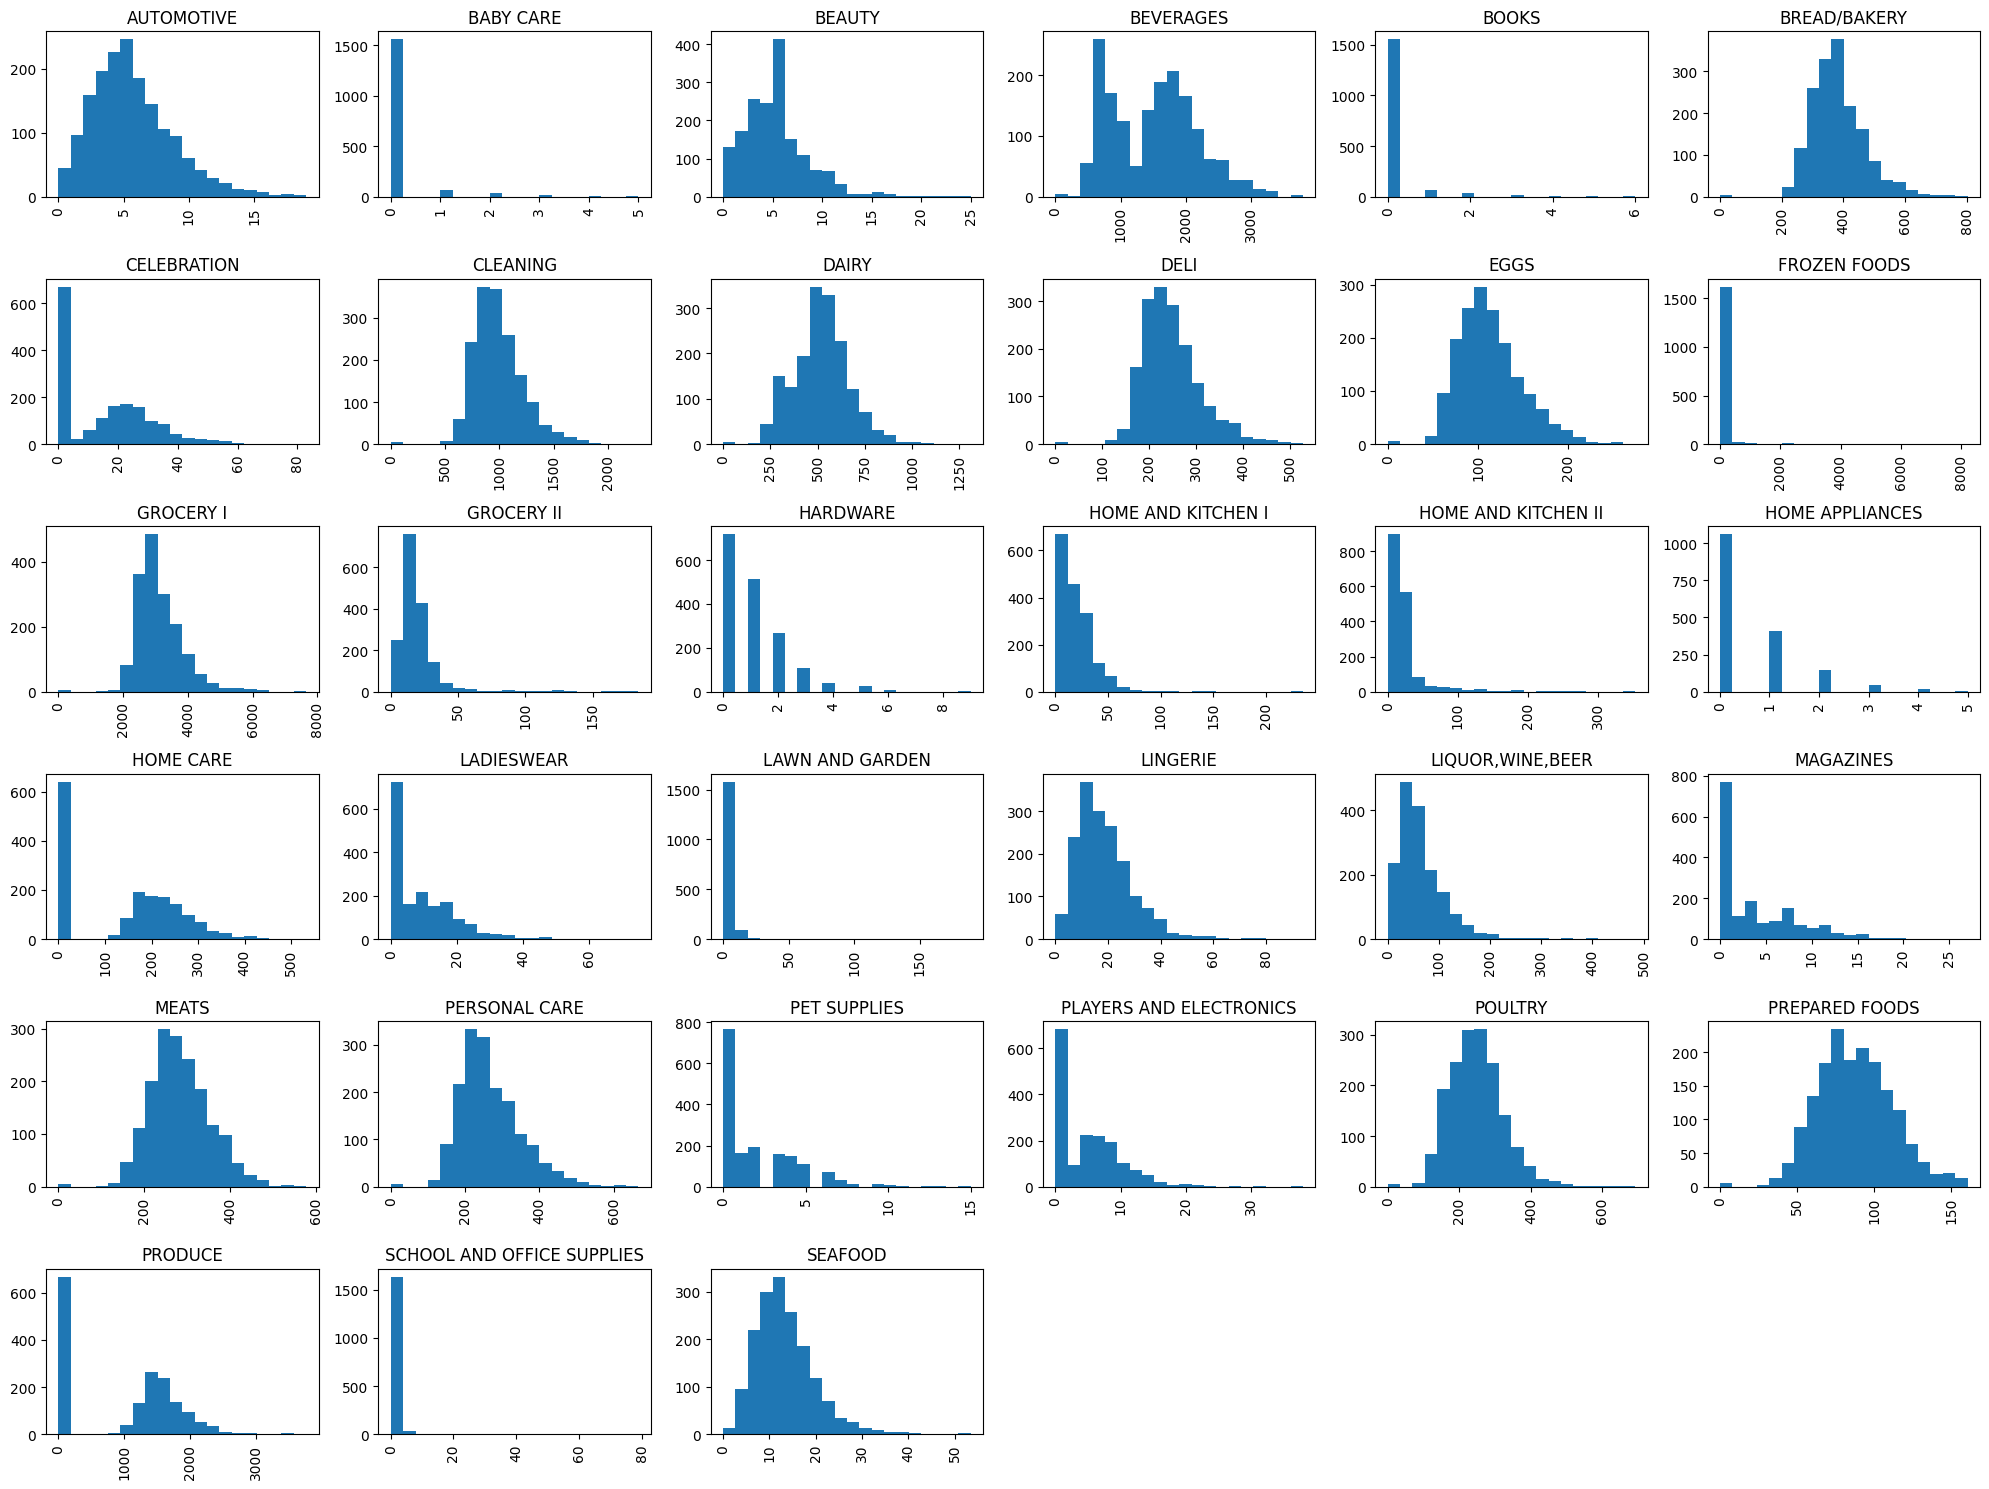

In [11]:
# histograms
data.hist('sales', by='family', figsize=(20,15), bins=20)
plt.tight_layout()

In [12]:
# filter family Grocery I
data_grocery = data[data["family"] == "GROCERY I"]
data_grocery

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico
12,1464,2013-01-01,5,GROCERY I,0.0,0,NaN
45,3246,2013-01-02,5,GROCERY I,4558.0,0,93.14
78,5028,2013-01-03,5,GROCERY I,3260.0,0,92.97
111,6810,2013-01-04,5,GROCERY I,3085.0,0,93.12
144,8592,2013-01-05,5,GROCERY I,3398.0,0,NaN
...,...,...,...,...,...,...,...
55419,2993442,2017-08-11,5,GROCERY I,2864.0,35,48.81
55452,2995224,2017-08-12,5,GROCERY I,2476.0,31,NaN
55485,2997006,2017-08-13,5,GROCERY I,3141.0,31,NaN
55518,2998788,2017-08-14,5,GROCERY I,2717.0,32,47.59


In [13]:
data_new = data[['date', 'store_nbr', 'family', 'sales', 'onpromotion', 'dcoilwtico']]
data_new

,date,store_nbr,family,sales,onpromotion,dcoilwtico
0,2013-01-01,5,AUTOMOTIVE,0.000,0,NaN
1,2013-01-01,5,BABY CARE,0.000,0,NaN
2,2013-01-01,5,BEAUTY,0.000,0,NaN
3,2013-01-01,5,BEVERAGES,0.000,0,NaN
4,2013-01-01,5,BOOKS,0.000,0,NaN
...,...,...,...,...,...,...
55567,2017-08-15,5,POULTRY,241.011,1,47.57
55568,2017-08-15,5,PREPARED FOODS,52.121,0,47.57
55569,2017-08-15,5,PRODUCE,1357.823,4,47.57
55570,2017-08-15,5,SCHOOL AND OFFICE SUPPLIES,0.000,0,47.57


In [14]:
data_new['date'] = pd.to_datetime(data_new['date'])

# Rentang tanggal lengkap based on min & max
full_date = pd.date_range(start=data_new['date'].min(), end=data_new['date'].max(), freq='D')

family_combine = data_new[['store_nbr', 'family']].drop_duplicates()

missing_data = []

# Cari missing dates
#missing_dates = full_date_range.difference(data['date'])
#missing_dates

<ipython-input-14-6dc15d6b8b39>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['date'] = pd.to_datetime(data_new['date'])


In [15]:
for _, row in family_combine.iterrows():
  store_nbr = row['store_nbr']
  family = row['family']

  family_data = data_new[
        (data_new['store_nbr'] == store_nbr) &
        (data_new['family'] == family)
    ]

  missing_dates = full_date.difference(family_data['date'])

  for missing_date in missing_dates:
        missing_data.append({
            'store_nbr': store_nbr,  # Simpan store_nbr
            'family': family,        # Simpan family
            'date': missing_date,    # Tambahkan tanggal yang hilang
            'sales': 0,              # Isi nilai sales dengan 0
            'onpromotion': 0,        # Isi nilai onpromotion dengan 0
            'dcoilwtico': None       # Isi nilai dcoilwtico dengan None
        })

In [16]:
missing_data = pd.DataFrame(missing_data)

data_full = pd.concat([data_new, missing_data], ignore_index=True)

data_full = data_full.sort_values(by=['store_nbr', 'family', 'date']).reset_index(drop=True)

data_full

<ipython-input-16-112de5419d93>:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data_full = pd.concat([data_new, missing_data], ignore_index=True)


,date,store_nbr,family,sales,onpromotion,dcoilwtico
0,2013-01-01,5,AUTOMOTIVE,0.000,0,NaN
1,2013-01-02,5,AUTOMOTIVE,6.000,0,93.14
2,2013-01-03,5,AUTOMOTIVE,4.000,0,92.97
3,2013-01-04,5,AUTOMOTIVE,6.000,0,93.12
4,2013-01-05,5,AUTOMOTIVE,4.000,0,NaN
...,...,...,...,...,...,...
55699,2017-08-11,5,SEAFOOD,8.402,4,48.81
55700,2017-08-12,5,SEAFOOD,7.320,0,NaN
55701,2017-08-13,5,SEAFOOD,11.642,0,NaN
55702,2017-08-14,5,SEAFOOD,11.694,0,47.59


In [17]:
data_grocery = data[data['family'] == 'GROCERY I']
data_grocery

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico
12,1464,2013-01-01,5,GROCERY I,0.0,0,NaN
45,3246,2013-01-02,5,GROCERY I,4558.0,0,93.14
78,5028,2013-01-03,5,GROCERY I,3260.0,0,92.97
111,6810,2013-01-04,5,GROCERY I,3085.0,0,93.12
144,8592,2013-01-05,5,GROCERY I,3398.0,0,NaN
...,...,...,...,...,...,...,...
55419,2993442,2017-08-11,5,GROCERY I,2864.0,35,48.81
55452,2995224,2017-08-12,5,GROCERY I,2476.0,31,NaN
55485,2997006,2017-08-13,5,GROCERY I,3141.0,31,NaN
55518,2998788,2017-08-14,5,GROCERY I,2717.0,32,47.59


In [18]:
data_grocery = data_grocery[['date', 'store_nbr', 'family', 'sales', 'onpromotion', 'dcoilwtico']]

In [19]:
full_date = pd.date_range(start=data_grocery['date'].min(), end=data_grocery['date'].max(), freq='D')

missing_dates = full_date.difference(data_grocery['date'])
missing_dates

DatetimeIndex(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'], dtype='datetime64[ns]', freq=None)

In [20]:
data_december = data_grocery[data_grocery['date'].dt.month == 12]
data_december.head(60)

,date,store_nbr,family,sales,onpromotion,dcoilwtico
11034,2013-12-01,5,GROCERY I,4969.0,0,NaN
11067,2013-12-02,5,GROCERY I,3034.0,0,93.61
11100,2013-12-03,5,GROCERY I,2650.0,0,95.83
11133,2013-12-04,5,GROCERY I,2962.0,0,96.97
11166,2013-12-05,5,GROCERY I,2971.0,0,97.14
11199,2013-12-06,5,GROCERY I,2946.0,0,97.48
11232,2013-12-07,5,GROCERY I,3467.0,0,NaN
11265,2013-12-08,5,GROCERY I,4078.0,0,NaN
11298,2013-12-09,5,GROCERY I,4625.0,0,97.10
11331,2013-12-10,5,GROCERY I,2405.0,0,98.32


In [21]:
# reindex
data_grocery = data_grocery.set_index('date').reindex(full_date).reset_index()

data_grocery.rename(columns={'index': 'date'}, inplace=True)

# sales dan onpromotion dengan 0, dcoilwtico NaN
data_grocery[['sales', 'onpromotion']] = data_grocery[['sales', 'onpromotion']].fillna(0)

In [22]:
data_december = data_grocery[data_grocery['date'].dt.month == 12]
data_december.head(60)

,date,store_nbr,family,sales,onpromotion,dcoilwtico
334,2013-12-01,5.0,GROCERY I,4969.0,0.0,NaN
335,2013-12-02,5.0,GROCERY I,3034.0,0.0,93.61
336,2013-12-03,5.0,GROCERY I,2650.0,0.0,95.83
337,2013-12-04,5.0,GROCERY I,2962.0,0.0,96.97
338,2013-12-05,5.0,GROCERY I,2971.0,0.0,97.14
339,2013-12-06,5.0,GROCERY I,2946.0,0.0,97.48
340,2013-12-07,5.0,GROCERY I,3467.0,0.0,NaN
341,2013-12-08,5.0,GROCERY I,4078.0,0.0,NaN
342,2013-12-09,5.0,GROCERY I,4625.0,0.0,97.10
343,2013-12-10,5.0,GROCERY I,2405.0,0.0,98.32


In [23]:
# missing di store_nbr diisi 5 dan family sesuai variable
data_grocery['store_nbr'] = data_grocery['store_nbr'].fillna(5).astype(int)
data_grocery['family'] = data_grocery['family'].fillna('GROCERY I')

data_grocery

,date,store_nbr,family,sales,onpromotion,dcoilwtico
0,2013-01-01,5,GROCERY I,0.0,0.0,NaN
1,2013-01-02,5,GROCERY I,4558.0,0.0,93.14
2,2013-01-03,5,GROCERY I,3260.0,0.0,92.97
3,2013-01-04,5,GROCERY I,3085.0,0.0,93.12
4,2013-01-05,5,GROCERY I,3398.0,0.0,NaN
...,...,...,...,...,...,...
1683,2017-08-11,5,GROCERY I,2864.0,35.0,48.81
1684,2017-08-12,5,GROCERY I,2476.0,31.0,NaN
1685,2017-08-13,5,GROCERY I,3141.0,31.0,NaN
1686,2017-08-14,5,GROCERY I,2717.0,32.0,47.59


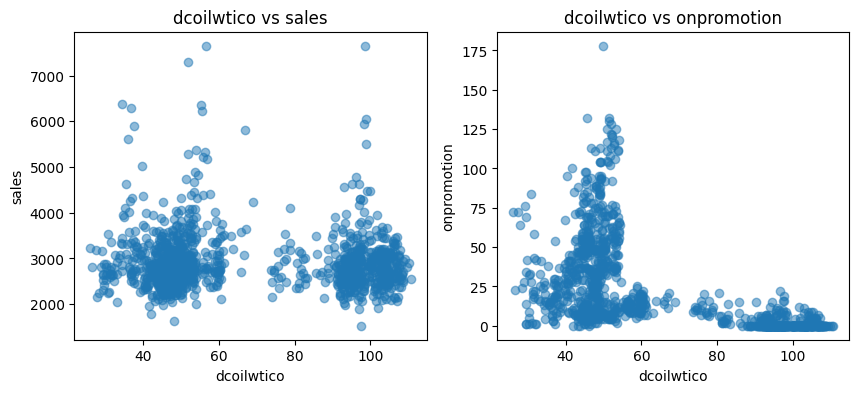

In [24]:
# scatterplot dcoilwtice vs sales
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.scatter(data_grocery["dcoilwtico"], data_grocery["sales"], alpha=0.5)
plt.xlabel("dcoilwtico")
plt.ylabel("sales")
plt.title("dcoilwtico vs sales")

# scatterplot dcoilwtico vs onpromotion
plt.subplot(1, 2, 2)
plt.scatter(data_grocery["dcoilwtico"], data_grocery["onpromotion"], alpha=0.5)
plt.xlabel("dcoilwtico")
plt.ylabel("onpromotion")
plt.title("dcoilwtico vs onpromotion")

plt.show()

In [25]:
# NaN sebelum interpolasi pakai metode Polynomial
data_grocery['dcoilwtico_interpolate'] = data_grocery['dcoilwtico'].interpolate(method='polynomial', order=2).fillna(method='bfill')

print(data_grocery['dcoilwtico_interpolate'].isnull().sum())

0


<ipython-input-25-8bcc1ef76e22>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_grocery['dcoilwtico_interpolate'] = data_grocery['dcoilwtico'].interpolate(method='polynomial', order=2).fillna(method='bfill')


In [26]:
data_grocery.head()

,date,store_nbr,family,sales,onpromotion,dcoilwtico,dcoilwtico_interpolate
0,2013-01-01,5,GROCERY I,0.0,0.0,NaN,93.140000
1,2013-01-02,5,GROCERY I,4558.0,0.0,93.14,93.140000
2,2013-01-03,5,GROCERY I,3260.0,0.0,92.97,92.970000
3,2013-01-04,5,GROCERY I,3085.0,0.0,93.12,93.120000
4,2013-01-05,5,GROCERY I,3398.0,0.0,NaN,93.205338


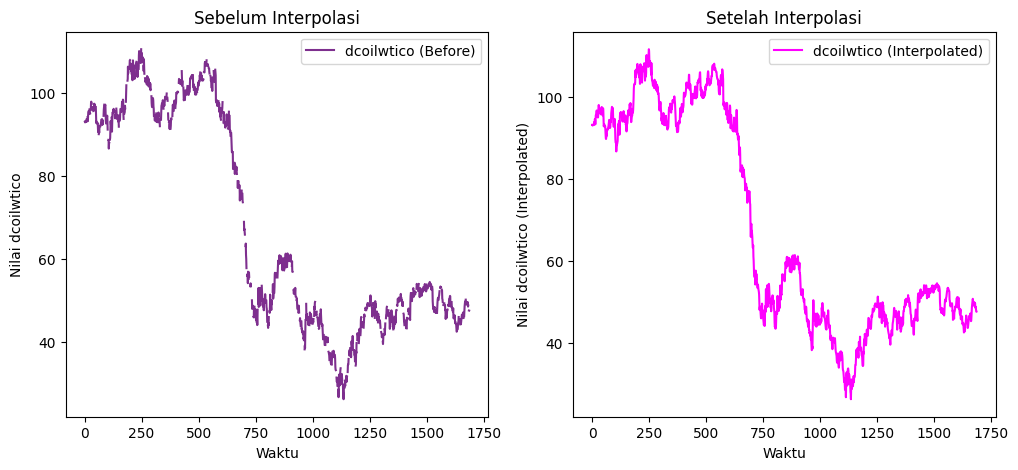

In [28]:
# plot comparison before & after interpolate

plt.figure(figsize=(12, 5))

# sebelum interpolasi
plt.subplot(1, 2, 1)
plt.plot(data_grocery['dcoilwtico'], label='dcoilwtico (Before)', color='#7E2F8E')
plt.title('Sebelum Interpolasi')
plt.xlabel('Waktu')
plt.ylabel('Nilai dcoilwtico')
plt.legend()

# setelah interpolasi
plt.subplot(1, 2, 2)
plt.plot(data_grocery['dcoilwtico_interpolate'], label='dcoilwtico (Interpolated)', color='magenta')
plt.title('Setelah Interpolasi')
plt.xlabel('Waktu')
plt.ylabel('Nilai dcoilwtico (Interpolated)')
plt.legend()

plt.show()

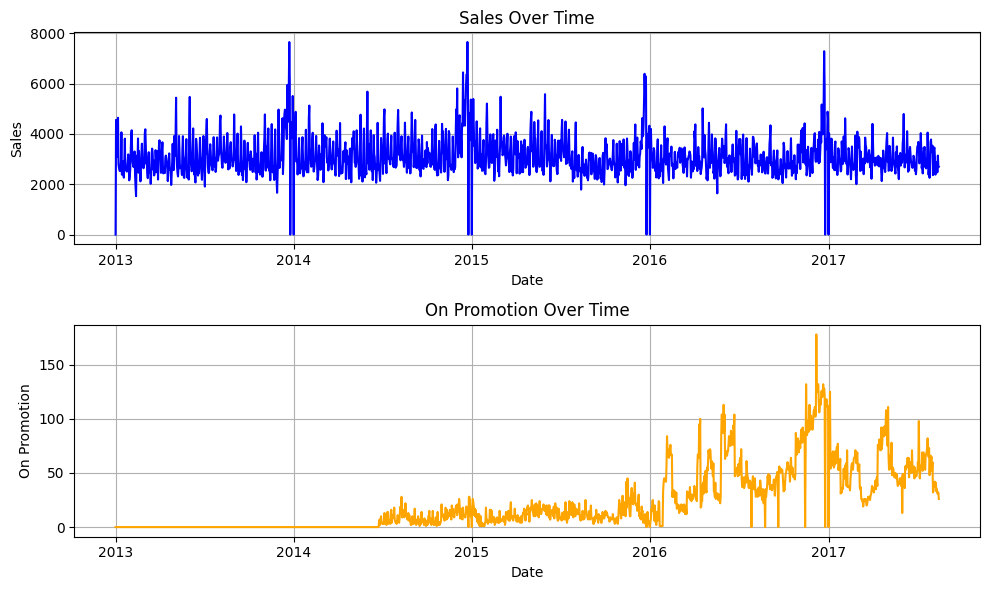

In [29]:
plt.style.use('default')

plt.figure(figsize=(10, 6), facecolor='white')

# plot Sales
plt.subplot(2, 1, 1)
plt.plot(data_grocery['date'], data_grocery['sales'], color='Blue')
plt.title("Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)

# plot On Promotion
plt.subplot(2, 1, 2)
plt.plot(data_grocery['date'], data_grocery['onpromotion'], color='Orange')
plt.title("On Promotion Over Time")
plt.xlabel("Date")
plt.ylabel("On Promotion")
plt.grid(True)

plt.tight_layout()
plt.show()

In [30]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series, series_name="Time Series"):
    result = adfuller(series.dropna())

    print(f"ADF Test for {series_name}:")
    print(f"ADF Statistics: {result[0]:.4f}")
    print(f"P-value: {result[1]:.4f}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"{key}: {value:.4f}")

    conclusion = "stationary (reject H0)" if result[1] < 0.05 else "non-stationary (fail to reject H0)"
    print(f"=> Data merupakan {conclusion}")

adf_test(data_grocery['sales'], "Sales")
adf_test(data_grocery['onpromotion'], "OnPromotion")

ADF Test for Sales:
ADF Statistics: -7.1433
P-value: 0.0000
Critical Values:
1%: -3.4343
5%: -2.8633
10%: -2.5677
=> Data merupakan stationary (reject H0)
ADF Test for OnPromotion:
ADF Statistics: -2.6803
P-value: 0.0775
Critical Values:
1%: -3.4343
5%: -2.8633
10%: -2.5677
=> Data merupakan non-stationary (fail to reject H0)


In [31]:
data_grocery['onpromotion_diff'] = data_grocery['onpromotion'].diff()

data_grocery

,date,store_nbr,family,sales,onpromotion,dcoilwtico,dcoilwtico_interpolate,onpromotion_diff
0,2013-01-01,5,GROCERY I,0.0,0.0,NaN,93.140000,NaN
1,2013-01-02,5,GROCERY I,4558.0,0.0,93.14,93.140000,0.0
2,2013-01-03,5,GROCERY I,3260.0,0.0,92.97,92.970000,0.0
3,2013-01-04,5,GROCERY I,3085.0,0.0,93.12,93.120000,0.0
4,2013-01-05,5,GROCERY I,3398.0,0.0,NaN,93.205338,0.0
...,...,...,...,...,...,...,...,...
1683,2017-08-11,5,GROCERY I,2864.0,35.0,48.81,48.810000,2.0
1684,2017-08-12,5,GROCERY I,2476.0,31.0,NaN,48.717426,-4.0
1685,2017-08-13,5,GROCERY I,3141.0,31.0,NaN,48.020802,0.0
1686,2017-08-14,5,GROCERY I,2717.0,32.0,47.59,47.590000,1.0


In [32]:
result = adfuller(data_grocery['onpromotion_diff'].dropna())

# hasil ADF Test
print(f'ADF Statistic: {result[0]}, p-value: {result[1]}')

# kesimpulan stasioneritas
print("Data belum stasioner, perlu dilakukan differencing."
      if result[1] > 0.05
      else "Data stasioner")

ADF Statistic: -9.669167854280806, p-value: 1.2907189853224762e-16
Data stasioner


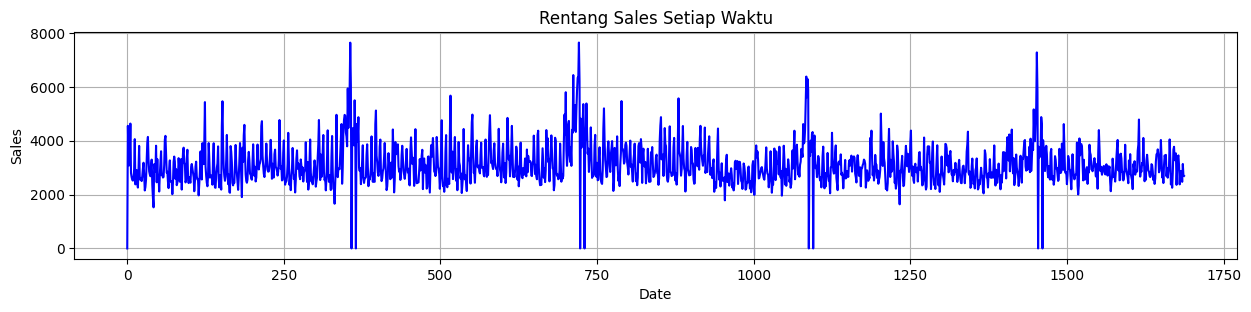

In [33]:
plt.figure(figsize=(15, 10))

# Plot untuk Sales
plt.subplot(3, 1, 1)
plt.plot(data_grocery.index, data_grocery['sales'], color='blue')
plt.title("Rentang Sales Setiap Waktu")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)

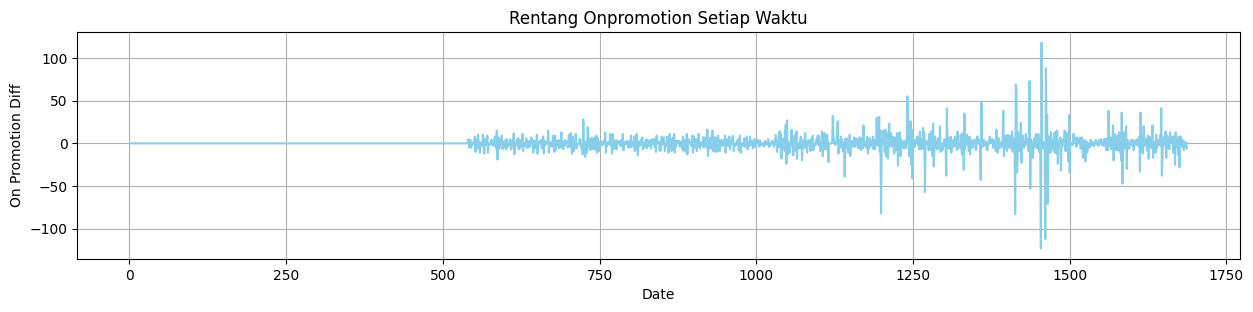

In [34]:
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 3)
plt.plot(data_grocery.index, data_grocery['onpromotion_diff'], color='skyblue')
plt.title("Rentang Onpromotion Setiap Waktu")
plt.xlabel("Date")
plt.ylabel("On Promotion Diff")
plt.grid(True)

plt.show()

In [35]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

data_grocery['onpromotion_diff'] = data_grocery['onpromotion'].diff()
data_grocery.dropna(inplace=True)

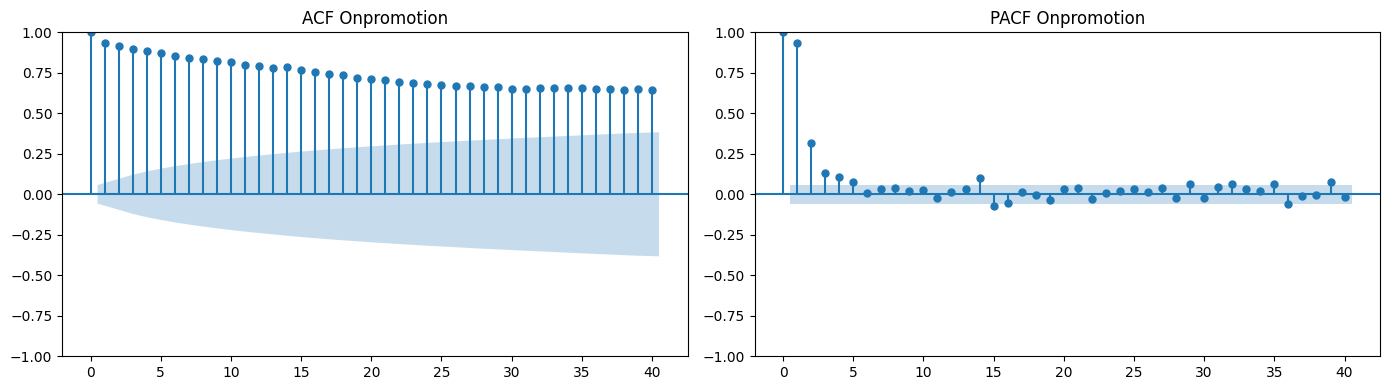

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# ACF & PACF On Promotion (Sebelum Differencing)
plot_acf(data_grocery['onpromotion'], lags=40, ax=axes[0])
axes[0].set_title("ACF Onpromotion")

plot_pacf(data_grocery['onpromotion'], lags=40, ax=axes[1])
axes[1].set_title("PACF Onpromotion")

plt.tight_layout()
plt.show()

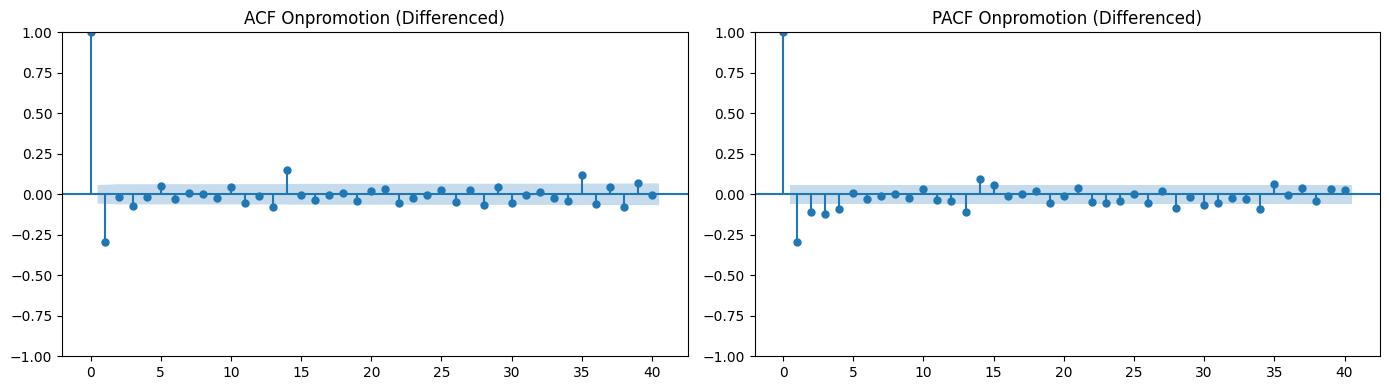

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

plot_acf(data_grocery['onpromotion_diff'], lags=40, ax=axes[0])
axes[0].set_title("ACF Onpromotion (Differenced)")

plot_pacf(data_grocery['onpromotion_diff'], lags=40, ax=axes[1])
axes[1].set_title("PACF Onpromotion (Differenced)")

plt.tight_layout()
plt.show()

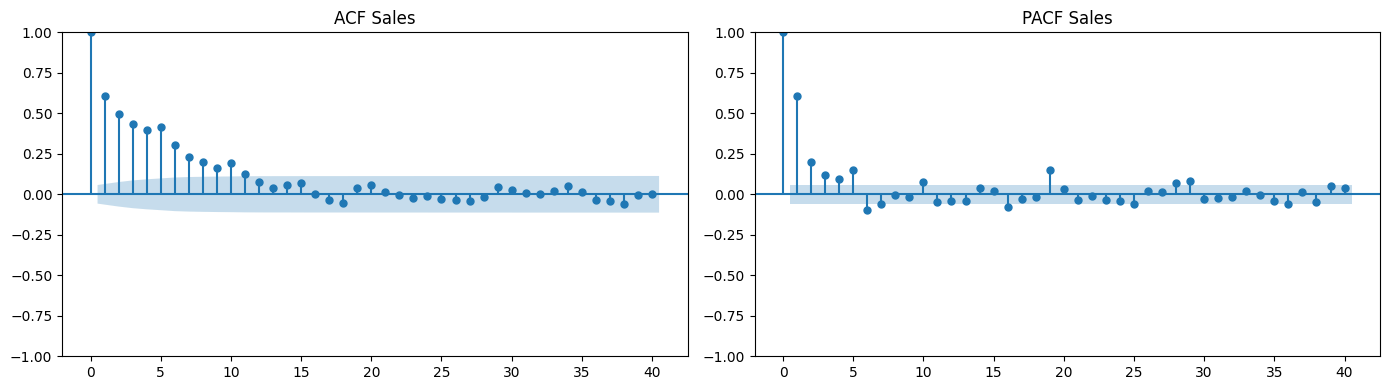

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

plot_acf(data_grocery['sales'], lags=40, ax=axes[0])
axes[0].set_title("ACF Sales")

plot_pacf(data_grocery['sales'], lags=40, ax=axes[1])
axes[1].set_title("PACF Sales")

plt.tight_layout()
plt.show()

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposisasi Sales dan Onpromotion
decompose_sales = seasonal_decompose(data_grocery['sales'], model='additive', period=7)
decompose_onpromo = seasonal_decompose(data_grocery['onpromotion'], model='additive', period=7)

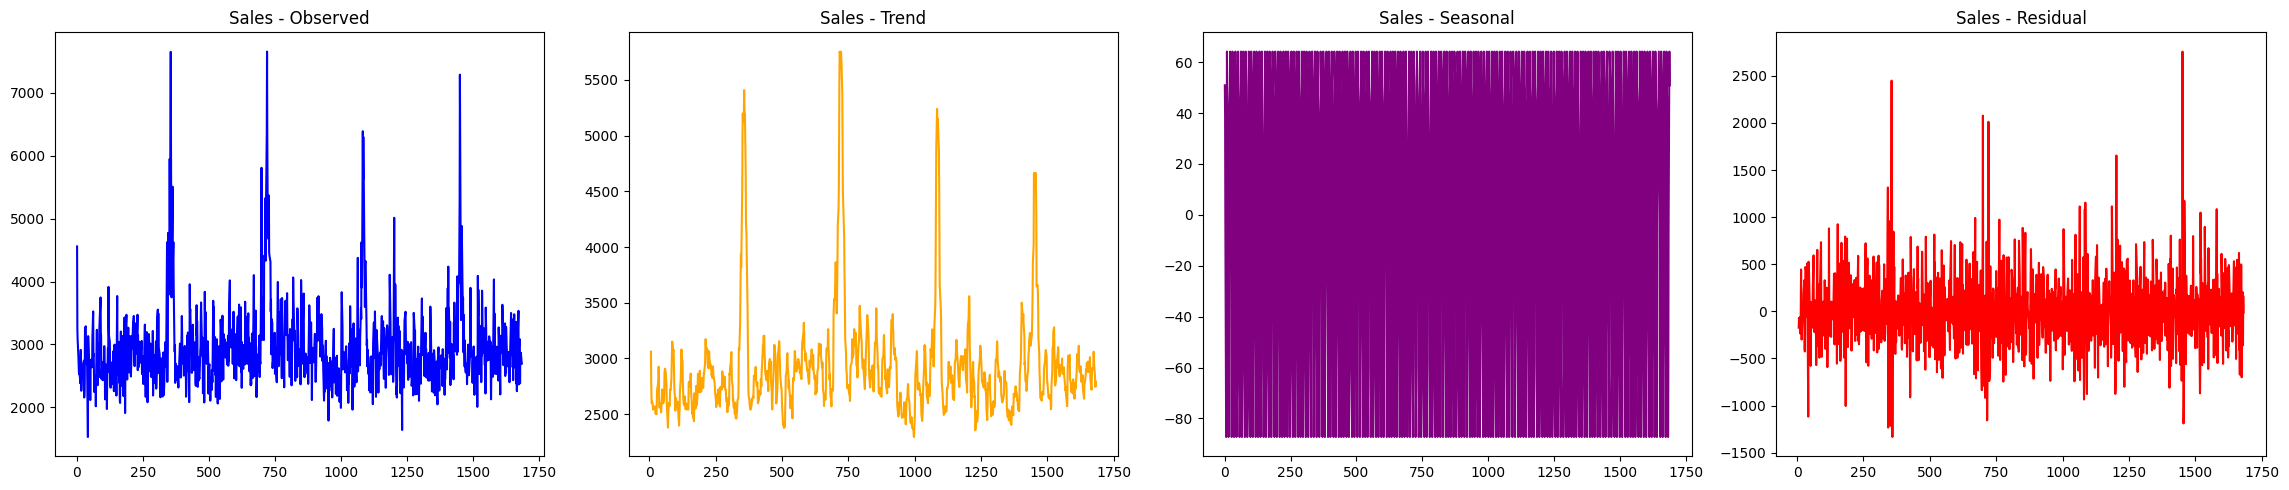

In [40]:
fig, axes = plt.subplots(1, 4, figsize=(23, 5))
colors = ['blue', 'orange', 'purple', 'red']

axes[0].plot(decompose_sales.observed, color=colors[0])
axes[0].set_title("Sales - Observed")

axes[1].plot(decompose_sales.trend, color=colors[1])
axes[1].set_title("Sales - Trend")

axes[2].plot(decompose_sales.seasonal, color=colors[2])
axes[2].set_title("Sales - Seasonal")

axes[3].plot(decompose_sales.resid, color=colors[3])
axes[3].set_title("Sales - Residual")

plt.tight_layout()
plt.show()

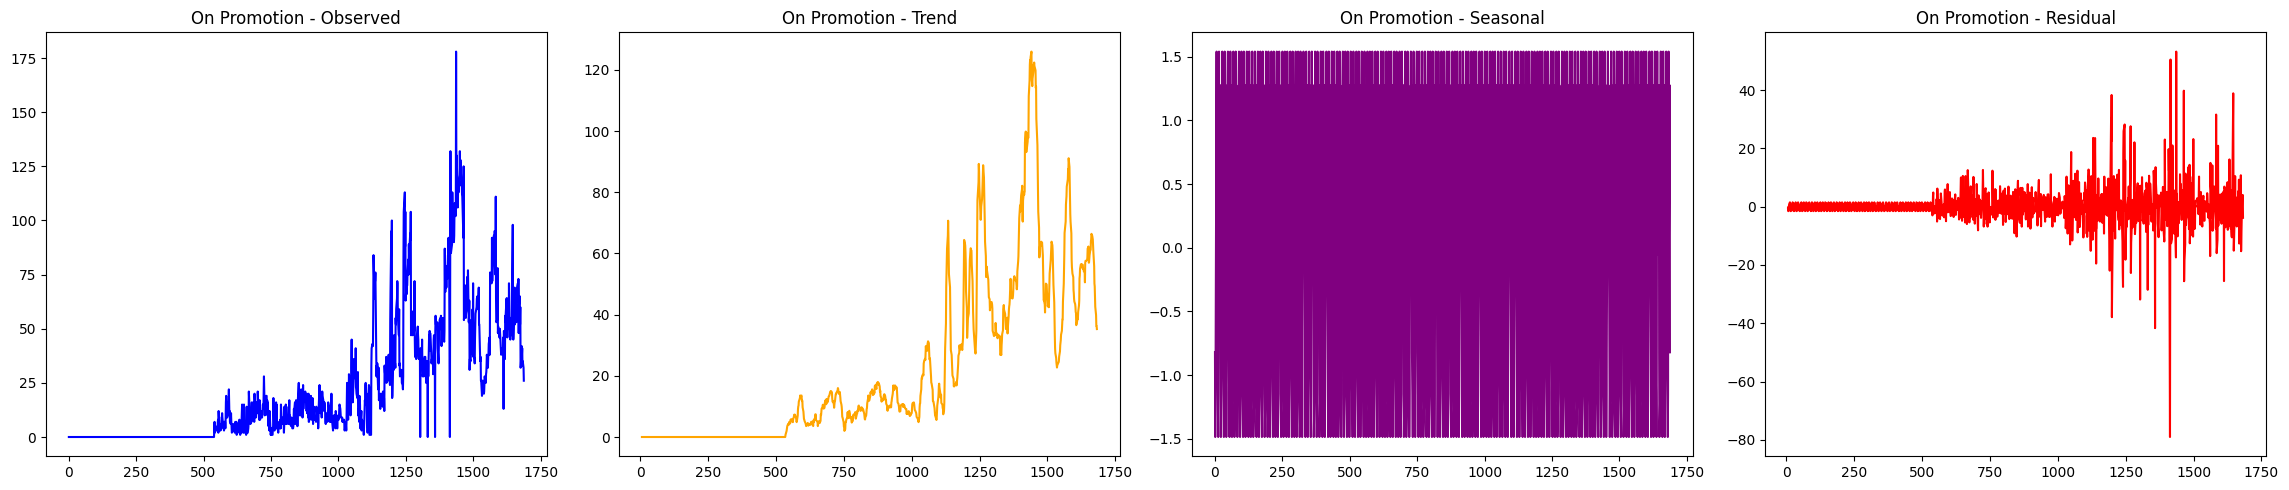

In [41]:
fig, axes = plt.subplots(1, 4, figsize=(23, 5))
colors = ['blue', 'orange', 'purple', 'red']

axes[0].plot(decompose_onpromo.observed, color=colors[0])
axes[0].set_title("On Promotion - Observed")

axes[1].plot(decompose_onpromo.trend, color=colors[1])
axes[1].set_title("On Promotion - Trend")

axes[2].plot(decompose_onpromo.seasonal, color=colors[2])
axes[2].set_title("On Promotion - Seasonal")

axes[3].plot(decompose_onpromo.resid, color=colors[3])
axes[3].set_title("On Promotion - Residual")

plt.tight_layout()
plt.show()

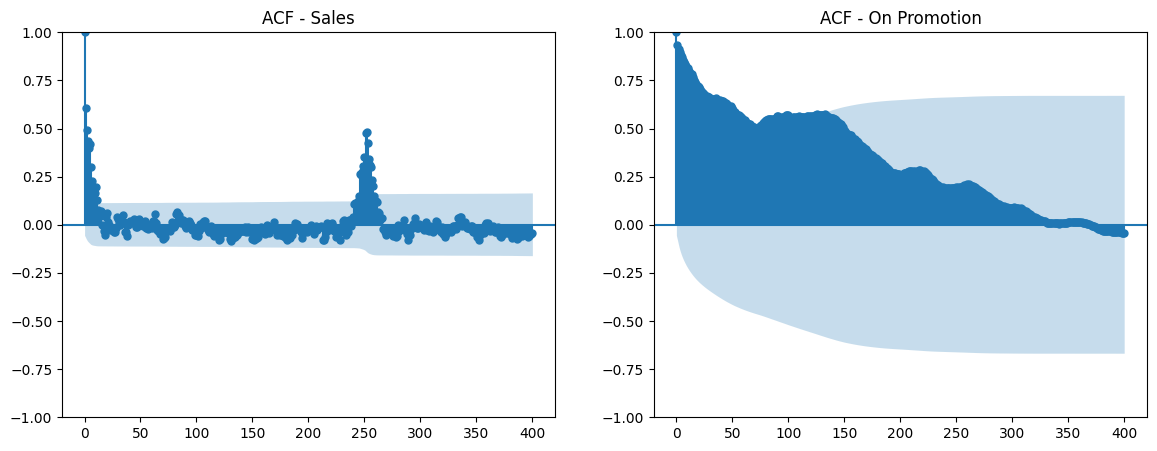

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ACF Sales
plot_acf(data_grocery['sales'], lags=400, ax=axes[0])
axes[0].set_title("ACF - Sales")

# ACF Onpromotion
plot_acf(data_grocery['onpromotion'], lags=400, ax=axes[1])
axes[1].set_title("ACF - On Promotion")

plt.show()

In [43]:
from statsmodels.tsa.stattools import acf

# Hitung ACF untuk sales
acf_values = acf(data_grocery['sales'], nlags=1100, fft=False)  # Gunakan fft=False untuk akurasi lebih baik

# Buat DataFrame baru untuk hasil ACF tanpa mengubah df_grocery
acf_df = pd.DataFrame({'Lag': np.arange(len(acf_values)), 'ACF_Sales': acf_values})

# Tentukan jumlah observasi
n = len(data_grocery['sales'])

# Hitung batas konfidensi 95%
conf_interval = 1.96 / np.sqrt(n)

# Tambahkan kolom untuk batas bawah dan atas
acf_df['Lower_Bound'] = -conf_interval
acf_df['Upper_Bound'] = conf_interval

# Filter hanya untuk lag tahunan (365, 730, 1095)
acf_yearly = acf_df[acf_df['Lag'].isin([365, 730, 1095])]

# Evaluasi apakah nilai ACF signifikan (di luar batas konfidensi)
acf_yearly['Significant'] = (acf_yearly['ACF_Sales'] > acf_yearly['Upper_Bound']) | (acf_yearly['ACF_Sales'] < acf_yearly['Lower_Bound'])

# Tampilkan hasil
acf_yearly

<ipython-input-43-d8e951f49f4b>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acf_yearly['Significant'] = (acf_yearly['ACF_Sales'] > acf_yearly['Upper_Bound']) | (acf_yearly['ACF_Sales'] < acf_yearly['Lower_Bound'])


,Lag,ACF_Sales,Lower_Bound,Upper_Bound,Significant
365,365,-0.005091,-0.057473,0.057473,False
730,730,-0.012035,-0.057473,0.057473,False
1095,1095,0.004081,-0.057473,0.057473,False


In [44]:
from scipy.stats import boxcox

data_grocery_new = data[['date','store_nbr','family','sales','onpromotion','dcoilwtico']]

In [45]:
data_grocery_new = data[data["family"] == "GROCERY I"]

data_grocery_new = data_grocery_new.set_index('date').reindex(full_date).reset_index()

data_grocery_new.rename(columns={'index': 'date'}, inplace=True)

data_grocery_new[['sales', 'onpromotion']] = data_grocery_new[['sales', 'onpromotion']].fillna(0)

data_grocery_new['store_nbr'] = data_grocery_new['store_nbr'].fillna(5).astype(int)
data_grocery_new['family'] = data_grocery_new['family'].fillna("GROCERY I")

data_grocery_new['onpromotion_boxcox'], lambda_bc = boxcox(data_grocery_new['onpromotion'] + 1)

data_grocery_new

,date,id,store_nbr,family,sales,onpromotion,dcoilwtico,onpromotion_boxcox
0,2013-01-01,1464.0,5,GROCERY I,0.0,0.0,NaN,0.000000
1,2013-01-02,3246.0,5,GROCERY I,4558.0,0.0,93.14,0.000000
2,2013-01-03,5028.0,5,GROCERY I,3260.0,0.0,92.97,0.000000
3,2013-01-04,6810.0,5,GROCERY I,3085.0,0.0,93.12,0.000000
4,2013-01-05,8592.0,5,GROCERY I,3398.0,0.0,NaN,0.000000
...,...,...,...,...,...,...,...,...
1683,2017-08-11,2993442.0,5,GROCERY I,2864.0,35.0,48.81,3.968569
1684,2017-08-12,2995224.0,5,GROCERY I,2476.0,31.0,NaN,3.825072
1685,2017-08-13,2997006.0,5,GROCERY I,3141.0,31.0,NaN,3.825072
1686,2017-08-14,2998788.0,5,GROCERY I,2717.0,32.0,47.59,3.862470


In [46]:
missing_dates = full_date.difference(data_grocery_new['date'])

data_grocery_new['dcoilwtico_interpolate'] = data_grocery_new['dcoilwtico'].interpolate('polynomial', order=2).bfill()
data_grocery_new

,date,id,store_nbr,family,sales,onpromotion,dcoilwtico,onpromotion_boxcox,dcoilwtico_interpolate
0,2013-01-01,1464.0,5,GROCERY I,0.0,0.0,NaN,0.000000,93.140000
1,2013-01-02,3246.0,5,GROCERY I,4558.0,0.0,93.14,0.000000,93.140000
2,2013-01-03,5028.0,5,GROCERY I,3260.0,0.0,92.97,0.000000,92.970000
3,2013-01-04,6810.0,5,GROCERY I,3085.0,0.0,93.12,0.000000,93.120000
4,2013-01-05,8592.0,5,GROCERY I,3398.0,0.0,NaN,0.000000,93.205338
...,...,...,...,...,...,...,...,...,...
1683,2017-08-11,2993442.0,5,GROCERY I,2864.0,35.0,48.81,3.968569,48.810000
1684,2017-08-12,2995224.0,5,GROCERY I,2476.0,31.0,NaN,3.825072,48.717426
1685,2017-08-13,2997006.0,5,GROCERY I,3141.0,31.0,NaN,3.825072,48.020802
1686,2017-08-14,2998788.0,5,GROCERY I,2717.0,32.0,47.59,3.862470,47.590000


In [47]:
from statsmodels.tsa.statespace.varmax import VARMAX
from sklearn.metrics import mean_absolute_error

endog = data_grocery_new[['sales', 'onpromotion_boxcox']]
exog = data_grocery_new[['dcoilwtico_interpolate']]

train_size = int(len(data_grocery) * 0.8)
train_endog, test_endog = endog[:train_size], endog[train_size:]
train_exog, test_exog = exog[:train_size], exog[train_size:]

train_endog

,sales,onpromotion_boxcox
0,0.0,0.000000
1,4558.0,0.000000
2,3260.0,0.000000
3,3085.0,0.000000
4,3398.0,0.000000
...,...,...
925,2865.0,1.684228
926,2840.0,2.205411
927,3482.0,2.924272
928,3864.0,2.338185


In [48]:
test_endog

,sales,onpromotion_boxcox
930,3246.0,3.527375
931,2736.0,2.999520
932,2986.0,2.924272
933,2835.0,3.374826
934,2613.0,2.666188
...,...,...
1683,2864.0,3.968569
1684,2476.0,3.825072
1685,3141.0,3.825072
1686,2717.0,3.862470


In [49]:
train_exog

,dcoilwtico_interpolate
0,93.140000
1,93.140000
2,92.970000
3,93.120000
4,93.205338
...,...
925,51.400000
926,50.900000
927,50.880000
928,50.564099


In [50]:
test_exog

,dcoilwtico_interpolate
930,50.110000
931,50.590000
932,49.270000
933,48.110000
934,47.980000
...,...
1683,48.810000
1684,48.717426
1685,48.020802
1686,47.590000


In [51]:
import itertools
from scipy.special import inv_boxcox

# Grid search
p_values = range(1, 5)  # AR
q_values = range(0, 4)  # MA
best_score, best_cfg, best_model = float("inf"), None, None

# Mean values untuk normalization
mean_sales = test_endog['sales'].mean()
mean_promo = test_endog['onpromotion_boxcox'].mean()

# Evaluasi Kombinasi (p, q)
for p, q in itertools.product(p_values, q_values):
    print(f"Evaluating VARMAX({p},{q})...")

    try:
        # Train VARMAX model
        model_fit = VARMAX(train_endog, exog=train_exog, order=(p, q), trend='c').fit(disp=False)

        # Forecast test data
        preds = model_fit.forecast(steps=len(test_endog), exog=test_exog)

        # Inverse 'onpromotion' ke original scale
        preds['onpromotion'] = inv_boxcox(preds['onpromotion_boxcox'], lambda_bc) - 1
        test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1

        # Hitung MAE for sales and promotions
        mae_sales = mean_absolute_error(test_endog['sales'], preds['sales'])
        mae_promo = mean_absolute_error(test_endog['onpromotion'], preds['onpromotion'])

        # Normalize MAE
        mae_normalized = (mae_sales / mean_sales) + (mae_promo / mean_promo)
        print(f"VARMAX({p},{q}) - Normalized MAE: {mae_normalized:.4f}")

        # Best model??
        if mae_normalized < best_score:
            best_score, best_cfg, best_model = mae_normalized, (p, q), model_fit

    except Exception as e:
        print(f"VARMAX({p},{q}) failed: {e}")

print(f"\nBest VARMAX order: {best_cfg} with Normalized MAE: {best_score:.4f}")

Evaluating VARMAX(1,0)...


<ipython-input-51-cf3ae6b1401b>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


VARMAX(1,0) - Normalized MAE: 8.5951
Evaluating VARMAX(1,1)...


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-51-cf3ae6b1401b>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

VARMAX(1,1) - Normalized MAE: 8.3613
Evaluating VARMAX(1,2)...


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-51-cf3ae6b1401b>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

VARMAX(1,2) - Normalized MAE: 8.4495
Evaluating VARMAX(1,3)...


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-51-cf3ae6b1401b>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

VARMAX(1,3) - Normalized MAE: 8.2138
Evaluating VARMAX(2,0)...


<ipython-input-51-cf3ae6b1401b>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


VARMAX(2,0) - Normalized MAE: 8.5472
Evaluating VARMAX(2,1)...


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-51-cf3ae6b1401b>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

VARMAX(2,1) - Normalized MAE: 8.5432
Evaluating VARMAX(2,2)...


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-51-cf3ae6b1401b>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

VARMAX(2,2) - Normalized MAE: 8.3110
Evaluating VARMAX(2,3)...


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-51-cf3ae6b1401b>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

VARMAX(2,3) - Normalized MAE: 8.3792
Evaluating VARMAX(3,0)...


<ipython-input-51-cf3ae6b1401b>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


VARMAX(3,0) - Normalized MAE: 8.4476
Evaluating VARMAX(3,1)...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-51-cf3ae6b1401b>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1
/usr/local/lib/python3.11/dist-packages/statsmod

VARMAX(3,1) - Normalized MAE: 8.5701
Evaluating VARMAX(3,2)...


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-51-cf3ae6b1401b>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

VARMAX(3,2) - Normalized MAE: 8.6570
Evaluating VARMAX(3,3)...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-51-cf3ae6b1401b>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1


VARMAX(3,3) - Normalized MAE: 8.6302
Evaluating VARMAX(4,0)...


<ipython-input-51-cf3ae6b1401b>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


VARMAX(4,0) - Normalized MAE: 8.4138
Evaluating VARMAX(4,1)...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-51-cf3ae6b1401b>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1
/usr/local/lib/python3.11/dist-packages/statsmod

VARMAX(4,1) - Normalized MAE: 8.2773
Evaluating VARMAX(4,2)...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-51-cf3ae6b1401b>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1
/usr/local/lib/python3.11/dist-packages/statsmod

VARMAX(4,2) - Normalized MAE: 8.6938
Evaluating VARMAX(4,3)...


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


VARMAX(4,3) - Normalized MAE: 8.9417

Best VARMAX order: (1, 3) with Normalized MAE: 8.2138


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
<ipython-input-51-cf3ae6b1401b>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_endog['onpromotion'] = inv_boxcox(test_endog['onpromotion_boxcox'], lambda_bc) - 1


In [52]:
# Prediksi menggunakan model terbaik
test_preds = best_model.forecast(steps=len(test_endog), exog=test_exog)

# Return onpromotion ke skala asli
test_preds['onpromotion'] = inv_boxcox(test_preds.pop('onpromotion_boxcox'), lambda_bc) - 1
test_preds

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


,sales,onpromotion
930,3693.759835,9.863945
931,3398.862773,9.537390
932,3383.146144,10.010486
933,3400.696310,10.663336
934,3410.355547,11.259363
...,...,...
1683,3434.663213,15.089449
1684,3435.034110,15.118501
1685,3436.717646,15.211884
1686,3438.535841,15.334741


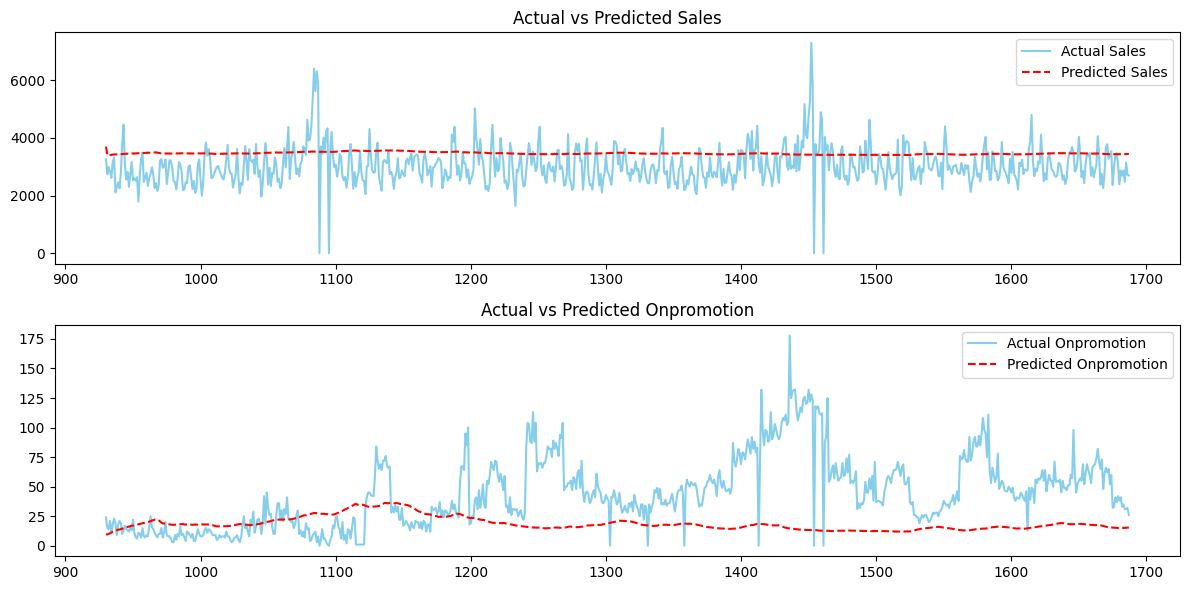

In [53]:
plt.figure(figsize=(12, 6))

for i, col in enumerate(['sales', 'onpromotion'], 1):
    plt.subplot(2, 1, i)
    plt.plot(test_endog.index, test_endog[col], label=f'Actual {col.title()}', color='skyblue')
    plt.plot(test_endog.index, test_preds[col], label=f'Predicted {col.title()}', color='red', linestyle='dashed')
    plt.title(f'Actual vs Predicted {col.title()}')
    plt.legend()

plt.tight_layout()
plt.show()

In [54]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import time
from sklearn.metrics import mean_squared_error

scaler_endog, scaler_exog = MinMaxScaler(), MinMaxScaler()
endog_scaled, exog_scaled = scaler_endog.fit_transform(endog), scaler_exog.fit_transform(exog)

print(f"Shape endog_scaled: {endog_scaled.shape}")


Shape endog_scaled: (1688, 2)


In [55]:
x, y = np.concatenate([exog_scaled, endog_scaled], axis=1), endog_scaled

print(f"x shape: {x.shape}, y shape: {y.shape}")

x shape: (1688, 3), y shape: (1688, 2)


In [56]:
def load_data(X, seq_len, train_size=0.9):
    seq_length = seq_len + 1
    data = []

    for i in range(len(X) - seq_length):
        data.append(X[i:i + seq_length])

    data = np.array(data)

    train_split = int(train_size * len(data))
    train_data, test_data = data[:train_split], data[train_split:]

    x_train = train_data[:, :-1]
    y_train = train_data[:, -1, 1:]
    x_test = test_data[:, :-1]
    y_test = test_data[:, -1, 1:]

    assert y_train.shape[1] == 2, "y_train should have 2 columns"
    assert y_test.shape[1] == 2, "y_test should have 2 columns"

    # Reshape data (3D)
    x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], X.shape[1])
    x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], X.shape[1])

    return x_train, y_train, x_test, y_test

window = 22
X_train, y_train, X_test, y_test = load_data(x, window)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (1498, 22, 3), y_train shape: (1498, 2)
X_test shape: (167, 22, 3), y_test shape: (167, 2)


In [57]:
model = Sequential()
model.add(LSTM(units=50, input_shape=(window, X_train.shape[2])))

# Tambah Dropout layer menghindari overfitting
model.add(Dropout(0.2))

# Tambah Dense layer 50 units
model.add(Dense(units=50, kernel_initializer='uniform', activation='tanh'))

# Output layer 2 units
model.add(Dense(units=2, kernel_initializer='uniform', activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error')

start = time.time()
history = model.fit(X_train, y_train, epochs=100, batch_size=35, validation_split=0.05, verbose=1)

print('Training time: ', time.time() - start)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1208 - val_loss: 0.0332
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0163 - val_loss: 0.0211
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0107 - val_loss: 0.0206
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0104 - val_loss: 0.0204
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0107 - val_loss: 0.0214
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0097 - val_loss: 0.0215
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0100 - val_loss: 0.0209
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0096 - val_loss: 0.0209
Epoch 9/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0090 - val_loss: 0.0205
Epoch 10/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0097 - val_loss: 0.0210
Epoch 11/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0092 - val_loss: 0.0210
Epoch 12/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0

In [58]:
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

trainPredict = scaler_endog.inverse_transform(trainPredict)
trainY = scaler_endog.inverse_transform(y_train)
testPredict = scaler_endog.inverse_transform(testPredict)
testY = scaler_endog.inverse_transform(y_test)

predicted_sales = testPredict[:, 0].reshape(-1, 1)
predicted_onpromotion = testPredict[:, 1].reshape(-1, 1)

actual_sales = testY[:, 0].reshape(-1, 1)
actual_onpromotion = testY[:, 1].reshape(-1, 1)

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [59]:
print(f"Plot actual sales shape: {actual_sales.shape}")
print(f"Plot predicted sales shape: {predicted_sales.shape}")

Plot actual sales shape: (167, 1)
Plot predicted sales shape: (167, 1)


In [60]:
trainScore_sales = mean_squared_error(trainY[:, 0], trainPredict[:, 0]) ** 0.5
testScore_sales = mean_squared_error(testY[:, 0], predicted_sales[:, 0]) ** 0.5

trainScore_onpromotion = mean_squared_error(trainY[:, 1], trainPredict[:, 1]) ** 0.5
testScore_onpromotion = mean_squared_error(testY[:, 1], predicted_onpromotion[:, 0]) ** 0.5

print(f'Train Score (sales): {trainScore_sales:.2f} RMSE Test Score (sales): {testScore_sales:.2f} RMSE')
print(f'Train Score (onpromotion): {trainScore_onpromotion:.2f} RMSE, Test Score (onpromotion): {testScore_onpromotion:.2f} RMSE')

Train Score (sales): 674.34 RMSE Test Score (sales): 474.83 RMSE
Train Score (onpromotion): 0.52 RMSE, Test Score (onpromotion): 0.25 RMSE


Text(0.5, 1.0, 'Sales Prediction')

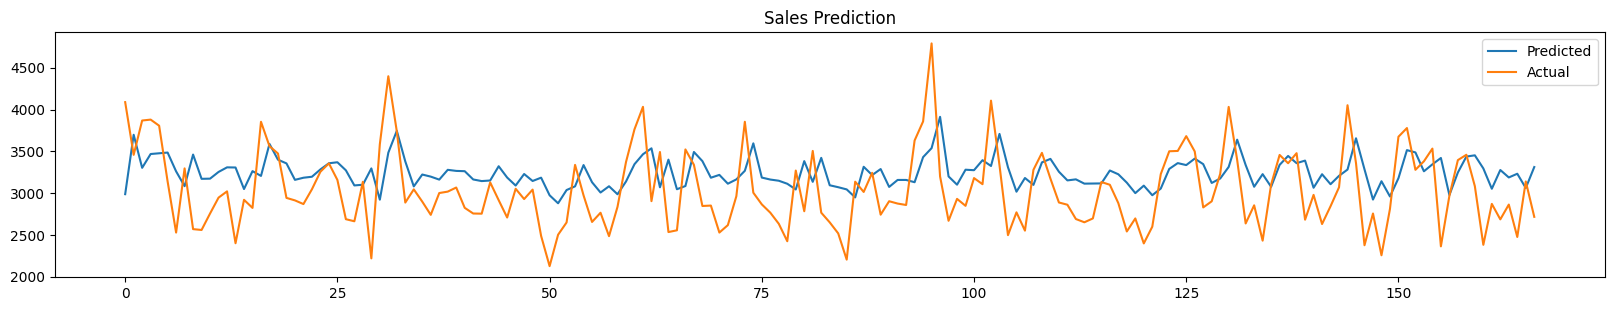

In [61]:
plt.figure(figsize=(20, 7))

# Sales plot
plt.subplot(2, 1, 1)
plt.plot(pd.DataFrame(predicted_sales), label='Predicted')
plt.plot(pd.DataFrame(actual_sales), label='Actual')
plt.legend(loc='best')
plt.title('Sales Prediction')



Text(0.5, 1.0, 'Onpromotion Prediction')

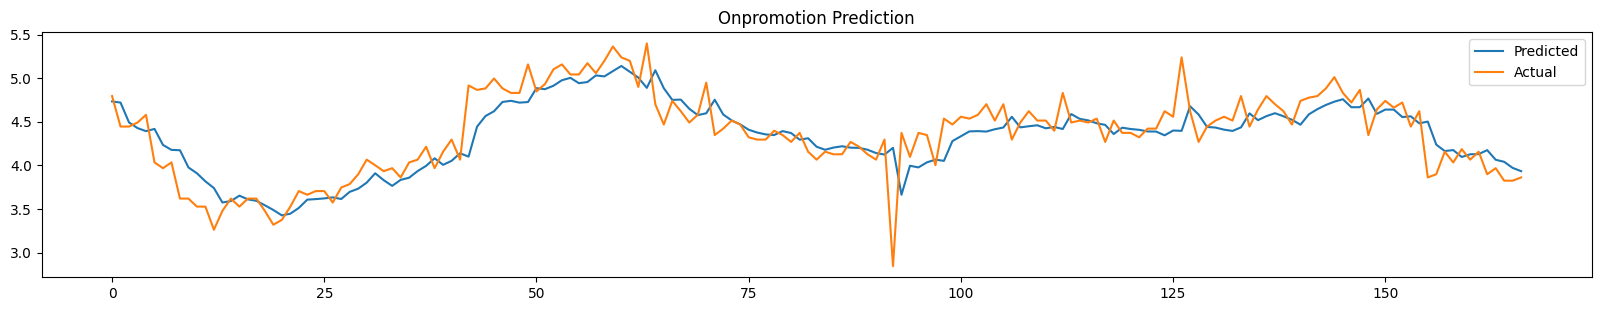

In [62]:
plt.figure(figsize=(20, 7))

# Onpromotion plot
plt.subplot(2, 1, 2)
plt.plot(pd.DataFrame(predicted_onpromotion), label='Predicted')
plt.plot(pd.DataFrame(actual_onpromotion), label='Actual')
plt.legend(loc='best')
plt.title('Onpromotion Prediction')